# PROYECTO MODULO 3 : GRUPO 2

## Importar Librerias y Abrir Archivo

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import re

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_rows', None) # ver todas las filas

In [2]:
# Abrimos el archivo 
df = pd.read_csv("HR RAW DATA.csv", index_col = 0)

## Explicacion de las columnas del csv



Las columnas que os encontraréis en el DataFrame son:

    - Age: Edad del empleado.

    - Attrition: Indica si el empleado dejó la empresa (Yes/No).

    - BusinessTravel: Frecuencia de viajes laborales (e.g., travel_rarely).

    - DailyRate: Tarifa diaria estimada para clientes, calculada en base al salario.

    - Department: Departamento en el que trabaja el empleado.

    - DistanceFromHome: Distancia en millas o kilómetros desde el hogar al trabajo.

    - Education: Nivel educativo del empleado en escala numérica.

    - EducationField: Campo de estudio académico del empleado.

    - employeecount: Valor constante de "1", indicando un solo empleado por registro.

    - employeenumber: Número de identificación del empleado.

    - EnvironmentSatisfaction: Nivel de satisfacción con el ambiente laboral.

    - Gender: Género del empleado.

    - HourlyRate: Tarifa por hora calculada.

    - JobInvolvement: Nivel de compromiso del empleado en el trabajo.

    - JobLevel: Nivel jerárquico del puesto del empleado.

    - JobRole: Función o rol específico del empleado.

    - JobSatisfaction: Satisfacción general en el puesto.

    - MaritalStatus: Estado civil (e.g., Single, Married).

    - MonthlyIncome: Ingreso mensual estimado en base al salario anual.

    - MonthlyRate: Tarifa mensual estimada en función de la tarifa diaria.

    - NUMCOMPANIESWORKED: Número de empresas previas en las que ha trabajado.

    - OverTime: Indica si el empleado trabaja horas extras (Yes/No).

    - PercentSalaryHike: Incremento porcentual en el salario.

    - PerformanceRating: Evaluación de desempeño en una escala numérica.

    - RelationshipSatisfaction: Satisfacción con relaciones interpersonales en el trabajo.

    - StandardHours: Clasificación de jornada (Full Time/Part Time).

    - StockOptionLevel: Nivel de opciones sobre acciones asignadas.

    - TOTALWORKINGYEARS: Años totales de experiencia laboral.

    - TrainingTimesLastYear: Número de sesiones de entrenamiento en el último año.

    - WORKLIFEBALANCE: Nivel de balance entre vida personal y laboral.

    - YearsAtCompany: Años en la empresa actual.

    - YearsInCurrentRole: Años en el rol actual.

    - YearsSinceLastPromotion: Años desde la última promoción recibida.

    - YEARSWITHCURRMANAGER: Años trabajando con el mismo gerente.

    - DateBirth: Año de nacimiento del empleado.

    - Salary: Salario anual calculado para el empleado.

    - RoleDepartament: Combinación de rol y departamento.

    - NUMBERCHILDREN: Número de hijos del empleado (si está disponible).

    - RemoteWork: Indica si el empleado trabaja de forma remota (Yes/No).

## Fase 1: Análisis Exploratorio de Datos (EDA)

In [3]:
# FUNCION ANALSIS EDA

def eda_basico(df):

    print('🌷Ejemplo de datos del DF:')
    display(df.head(3))
    display(df.tail(3))
    display(df.sample(3))
    print('________________________________________________________________________________________________________')

    print('🌻Número de Filas:')
    display(df.shape[0])
    print('________________________________________________________________________________________________________')

    print('🌱Número de Columnas:')
    display(df.shape[1])
    print('________________________________________________________________________________________________________')

    print('🌼Información de la tabla:')
    display(df.info())
    print('________________________________________________________________________________________________________')

    print('🌑Nombre de las columnas:')
    display(df.columns)
    print('________________________________________________________________________________________________________')

    print('🍄Descripción de los datos numéricos:')
    display(df.describe().T)
    print('________________________________________________________________________________________________________')

    print('🌋Descripción de los datos no-numéricos:')
    display(df.describe(include='object').T)
    print('________________________________________________________________________________________________________')

    print('🍂Saber si hay datos únicos:')
    display(df.nunique())
    print('________________________________________________________________________________________________________')

    print('🐖Que datos son nulos por columnas:')
    display(df.isnull().sum())
    print('________________________________________________________________________________________________________')

    print('🐲Filas duplicadas:')
    total_duplicados = df.duplicated().sum()
    if total_duplicados > 0:
        print(f'cantidad de duplicados: {total_duplicados}')
        print('Primeros duplicados')
        display(df[df.duplicated()].head(3))
    else:
        print('No hay duplicados')
    print('________________________________________________________________________________________________________')

    print('🪹 Columnas constantes (solo 1 valor único):')
    constantes = df.columns[df.nunique() <= 1]
    if len(constantes) > 0:
        print(f'{len(constantes)} columnas con 1 valor único:')
        display(constantes)
    else:
        print('No hay columnas constantes')
    print('________________________________________________________________________________________________________')
    
    print('🚀 Valores únicos en columnas categóricas:')
    for col in df.select_dtypes(include='object'):
        print(f'🔸 {col}')
        print('-----------------------------')
        print(df[col].unique())
        print('________________________________________________________________________________________________________')

    print('🧬 Tipos de datos por columna:')
    display(df.dtypes.value_counts())
    print('________________________________________________________________________________________________________')

In [4]:
# EJECUCION ANALSIS EDA
eda_basico (df)

🌷Ejemplo de datos del DF:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1
2,42,No,travel_rarely,"532,0$",Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,ManaGER,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000$,ManaGER - Research & Development,NaN,1


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
1611,39,No,travel_rarely,"903,0$",NaN,-13,5,NaN,1,NaN,13,0,41,4,3,sAlES ExECUTivE,3,Single,NaN,2560,0,NaN,No,18,"3,0",4,NaN,0,"9,0",3,"3,0",8,NaN,0,7,NaN,1984,1000000000$,NaN,NaN,Yes
1612,36,No,non-travel,"1229,0$",NaN,8,4,Technical Degree,1,"990,0",1,0,84,3,2,SaLes ExecUtIVe,4,Divorced,NaN,25952,4,NaN,No,13,NaN,4,NaN,2,"12,0",3,"3,0",7,NaN,0,7,NaN,1987,1000000000$,NaN,NaN,True
1613,46,No,NaN,"566,0$",NaN,7,2,Medical,1,NaN,4,0,75,3,3,mAnUfactURInG DiRECTOr,3,NaN,"10845,0",24208,6,Y,NaN,13,"3,0",2,NaN,1,NaN,3,"3,0",8,NaN,0,7,"10845,0",1977,1000000000$,NaN,NaN,0


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
1243,36,Yes,NaN,"318,0$",NaN,9,3,Medical,1,NaN,4,0,Not Available,2,1,ReSEARch SciEntiST,3,NaN,"3388,0",21777,0,NaN,NaN,17,"3,0",1,NaN,1,NaN,0,"2,0",1,NaN,0,0,"3388,0",1987,1000000000$,NaN,NaN,True
1422,32,Yes,travel_rarely,"1259,0$",NaN,2,4,Life Sciences,1,NaN,4,0,95,3,1,LAbOrATORY tEChNiciAn,2,Single,"1393,0",24852,1,NaN,No,12,"3,0",1,NaN,0,"1,0",2,"3,0",1,NaN,0,0,"1393,0",1991,1000000000$,NaN,NaN,1
42,53,No,NaN,"1376,0$",NaN,2,2,Medical,1,"981,0",3,0,Not Available,3,4,ManageR,3,Divorced,NaN,13938,6,NaN,No,13,"3,0",3,NaN,1,"22,0",3,"4,0",17,NaN,15,2,NaN,1970,1000000000$,NaN,NaN,False


________________________________________________________________________________________________________
🌻Número de Filas:


1614

________________________________________________________________________________________________________
🌱Número de Columnas:


41

________________________________________________________________________________________________________
🌼Información de la tabla:
<class 'pandas.core.frame.DataFrame'>
Index: 1614 entries, 0 to 1613
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1614 non-null   object 
 1   Attrition                 1614 non-null   object 
 2   BusinessTravel            842 non-null    object 
 3   DailyRate                 1614 non-null   object 
 4   Department                302 non-null    object 
 5   DistanceFromHome          1614 non-null   int64  
 6   Education                 1614 non-null   int64  
 7   EducationField            869 non-null    object 
 8   employeecount             1614 non-null   int64  
 9   employeenumber            1183 non-null   object 
 10  EnvironmentSatisfaction   1614 non-null   int64  
 11  Gender                    1614 non-null   int64

None

________________________________________________________________________________________________________
🌑Nombre de las columnas:


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'employeecount',
       'employeenumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NUMCOMPANIESWORKED',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TOTALWORKINGYEARS', 'TrainingTimesLastYear', 'WORKLIFEBALANCE',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YEARSWITHCURRMANAGER', 'SameAsMonthlyIncome', 'DateBirth', 'Salary',
       'RoleDepartament', 'NUMBERCHILDREN', 'RemoteWork'],
      dtype='object')

________________________________________________________________________________________________________
🍄Descripción de los datos numéricos:


,count,mean,std,min,25%,50%,75%,max
DistanceFromHome,1614.0,4.527261,14.591913,-49.0,2.0,5.0,11.0,29.0
Education,1614.0,2.925031,1.022357,1.0,2.0,3.0,4.0,5.0
employeecount,1614.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
EnvironmentSatisfaction,1614.0,4.294919,6.993559,1.0,2.0,3.0,4.0,49.0
Gender,1614.0,0.398389,0.489718,0.0,0.0,0.0,1.0,1.0
JobInvolvement,1614.0,2.739777,0.711567,1.0,2.0,3.0,3.0,4.0
JobLevel,1614.0,2.068154,1.101344,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,1614.0,2.738538,1.106163,1.0,2.0,3.0,4.0,4.0
MonthlyRate,1614.0,14284.495663,7110.414585,2094.0,8001.0,14248.5,20364.0,26999.0
NUMCOMPANIESWORKED,1614.0,2.673482,2.506152,0.0,1.0,2.0,4.0,9.0


________________________________________________________________________________________________________
🌋Descripción de los datos no-numéricos:


,count,unique,top,freq
Age,1614,54,35,84
Attrition,1614,2,No,1355
BusinessTravel,842,3,travel_rarely,586
DailyRate,1614,849,nan$,124
Department,302,3,Research & Development,196
EducationField,869,6,Life Sciences,349
employeenumber,1183,1079,"482,0",2
HourlyRate,1614,72,Not Available,84
JobRole,1614,1579,mANager,4
MaritalStatus,963,5,Married,404


________________________________________________________________________________________________________
🍂Saber si hay datos únicos:


Age                           54
Attrition                      2
BusinessTravel                 3
DailyRate                    849
Department                     3
DistanceFromHome              69
Education                      5
EducationField                 6
employeecount                  1
employeenumber              1079
EnvironmentSatisfaction       38
Gender                         2
HourlyRate                    72
JobInvolvement                 4
JobLevel                       5
JobRole                     1579
JobSatisfaction                4
MaritalStatus                  5
MonthlyIncome                668
MonthlyRate                 1427
NUMCOMPANIESWORKED            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TOTALWORKINGYEARS             40
TrainingTimesLastYear          7
WORKLIFEBA

________________________________________________________________________________________________________
🐖Que datos son nulos por columnas:


Age                            0
Attrition                      0
BusinessTravel               772
DailyRate                      0
Department                  1312
DistanceFromHome               0
Education                      0
EducationField               745
employeecount                  0
employeenumber               431
EnvironmentSatisfaction        0
Gender                         0
HourlyRate                     0
JobInvolvement                 0
JobLevel                       0
JobRole                        0
JobSatisfaction                0
MaritalStatus                651
MonthlyIncome                843
MonthlyRate                    0
NUMCOMPANIESWORKED             0
Over18                       901
OverTime                     676
PercentSalaryHike              0
PerformanceRating            195
RelationshipSatisfaction       0
StandardHours               1195
StockOptionLevel               0
TOTALWORKINGYEARS            526
TrainingTimesLastYear          0
WORKLIFEBA

________________________________________________________________________________________________________
🐲Filas duplicadas:
No hay duplicados
________________________________________________________________________________________________________
🪹 Columnas constantes (solo 1 valor único):
5 columnas con 1 valor único:


Index(['employeecount', 'Over18', 'StandardHours', 'Salary', 'NUMBERCHILDREN'], dtype='object')

________________________________________________________________________________________________________
🚀 Valores únicos en columnas categóricas:
🔸 Age
-----------------------------
['51' '52' '42' '47' '46' '48' '59' '41' '56' '38' '55' '40' '58' '35'
 '45' '33' '36' '34' 'forty-seven' '53' '43' '60' '32' '37' '49' '39' '50'
 '44' '30' 'fifty-eight' '29' '31' '54' '57' '27' 'thirty-six' '28' '26'
 'fifty-five' '25' 'fifty-two' 'thirty-one' '24' 'thirty' '23' '22' '21'
 '20' 'twenty-six' '19' 'thirty-seven' '18' 'thirty-two' 'twenty-four']
________________________________________________________________________________________________________
🔸 Attrition
-----------------------------
['No' 'Yes']
________________________________________________________________________________________________________
🔸 BusinessTravel
-----------------------------
[nan 'travel_rarely' 'travel_frequently' 'non-travel']
______________________________________________________________________________________

object     22
int64      18
float64     1
Name: count, dtype: int64

________________________________________________________________________________________________________


In [5]:
# VER VALORES UNICOS CATEGORICOS

for col in df.select_dtypes(include='object'):
    print(col)
    print(df[col].unique())
    print('-----------------------------')
    

Age
['51' '52' '42' '47' '46' '48' '59' '41' '56' '38' '55' '40' '58' '35'
 '45' '33' '36' '34' 'forty-seven' '53' '43' '60' '32' '37' '49' '39' '50'
 '44' '30' 'fifty-eight' '29' '31' '54' '57' '27' 'thirty-six' '28' '26'
 'fifty-five' '25' 'fifty-two' 'thirty-one' '24' 'thirty' '23' '22' '21'
 '20' 'twenty-six' '19' 'thirty-seven' '18' 'thirty-two' 'twenty-four']
-----------------------------
Attrition
['No' 'Yes']
-----------------------------
BusinessTravel
[nan 'travel_rarely' 'travel_frequently' 'non-travel']
-----------------------------
DailyRate
['684,0$' '699,0$' '532,0$' '359,0$' '1319,0$' '117,0$' '1435,0$' '635,0$'
 '1276,0$' '840,0$' '247,0$' '1369,0$' '201,0$' '1360,0$' '692,0$'
 '1398,0$' '286,0$' '1402,0$' '819,0$' '884,0$' '1238,0$' '515,0$'
 '1223,0$' '202,0$' '928,0$' '607,0$' '266,0$' '429,0$' '589,0$' 'nan$'
 '1180,0$' '1282,0$' '776,0$' '665,0$' '526,0$' '1034,0$' '1403,0$'
 '1499,0$' '580,0$' '859,0$' '263,0$' '1376,0$' '885,0$' '1003,0$'
 '1321,0$' '394,0$' '13

In [6]:
# VER VALORES UNICOS NUMERICOS

for col in df.select_dtypes(include='number'):
    print(col)
    print(df[col].unique())
    print('-----------------------------')
    

DistanceFromHome
[  6   1   4   2   3  22  25   9   7  23  10  12  14 -13  15   8 -42  28
 -37   5  16 -35  26 -26  24  29 -25  17  21 -18 -10 -30 -27  20 -31 -29
 -39  18 -21 -15  11  13 -14  19 -33 -34 -46 -36 -19  27 -12 -23 -45 -28
 -47 -32 -24 -16 -22 -41 -49 -11 -48 -38 -20 -17 -43 -40 -44]
-----------------------------
Education
[3 4 2 1 5]
-----------------------------
employeecount
[1]
-----------------------------
EnvironmentSatisfaction
[ 1  3  4  2 42 37 35 25 27 31 39 21 15 14 33 19 12 13 28 47 36 29 24 46
 16 22 41 49 11 48 18 10 45 38 17 20 26 43]
-----------------------------
Gender
[0 1]
-----------------------------
JobInvolvement
[3 2 4 1]
-----------------------------
JobLevel
[5 4 3 2 1]
-----------------------------
JobSatisfaction
[3 4 1 2]
-----------------------------
MonthlyRate
[ 6462  5678  4933 ... 15302 26956 16642]
-----------------------------
NUMCOMPANIESWORKED
[7 0 1 3 2 4 8 9 5 6]
-----------------------------
PercentSalaryHike
[13 14 11 19 12 25 16 1

In [7]:
# % DE NULOS DE TODAS LAS COLUMNAS

porc_nulos = (df.isnull().sum() / df.shape[0]) * 100

# lo convertimos a DataFrame
df_nulos = pd.DataFrame(porc_nulos, columns = ["%_nulos"])

# filtramos el DataFrame para quedarnos solo con aquellas columnas que tengan nulos
df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
BusinessTravel,47.831475
Department,81.288724
EducationField,46.158612
employeenumber,26.703841
MaritalStatus,40.334572
MonthlyIncome,52.230483
Over18,55.824040
OverTime,41.883519
PerformanceRating,12.081784
StandardHours,74.039653


## Fase 2: Transformación de los datos.

### 1. ELIMINAMOS COLUMNAS QUE NO APORTAN VALOR

In [8]:
    #employeecount (solo hay unos)
    #NUMBERCHILDREN (solo hay nulos)
    #Salary(malcalculado)
    #SameAsMonthlyIncome (igual a columna MonthlyIncome)

df.drop(["employeecount","NUMBERCHILDREN","Salary","SameAsMonthlyIncome"], axis = 1, inplace = True)
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,DateBirth,RoleDepartament,RemoteWork
0,51,No,NaN,"684,0$",NaN,6,3,NaN,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,1972,NaN,Yes
1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,1971,NaN,1
2,42,No,travel_rarely,"532,0$",Research & Development,4,2,Technical Degree,"319,0",3,0,58,3,5,ManaGER,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,1981,ManaGER - Research & Development,1
3,47,No,travel_rarely,"359,0$",NaN,2,4,Medical,NaN,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,1976,NaN,False
4,46,No,NaN,"1319,0$",NaN,3,3,Technical Degree,NaN,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,1977,NaN,0


### 2. HOMOGENEIZAMOS NOMBRE DE LAS COLUMNAS

In [9]:
#2.1 Funcion "normalize_column" para modificar los nombres de las columnas con Title y separados por _

def normalize_column(name):
    if name.isupper():
        words = re.findall(r'[A-Z][^A-Z]*', name)
    else:
        words = re.findall(r'[A-Z]?[a-z]+|[A-Z]+(?![a-z])|\d+', name)

    # Capitalizar cada palabra y unir con "_"
    return '_'.join(word.capitalize() for word in words)

new_columns = [normalize_column(col) for col in df.columns]
print(new_columns)


['Age', 'Attrition', 'Business_Travel', 'Daily_Rate', 'Department', 'Distance_From_Home', 'Education', 'Education_Field', 'Employeenumber', 'Environment_Satisfaction', 'Gender', 'Hourly_Rate', 'Job_Involvement', 'Job_Level', 'Job_Role', 'Job_Satisfaction', 'Marital_Status', 'Monthly_Income', 'Monthly_Rate', 'N_U_M_C_O_M_P_A_N_I_E_S_W_O_R_K_E_D', 'Over_18', 'Over_Time', 'Percent_Salary_Hike', 'Performance_Rating', 'Relationship_Satisfaction', 'Standard_Hours', 'Stock_Option_Level', 'T_O_T_A_L_W_O_R_K_I_N_G_Y_E_A_R_S', 'Training_Times_Last_Year', 'W_O_R_K_L_I_F_E_B_A_L_A_N_C_E', 'Years_At_Company', 'Years_In_Current_Role', 'Years_Since_Last_Promotion', 'Y_E_A_R_S_W_I_T_H_C_U_R_R_M_A_N_A_G_E_R', 'Date_Birth', 'Role_Departament', 'Remote_Work']


In [10]:
#2.2 Sustituyo los nombres de las nuevas columnas
df.columns = new_columns

In [11]:
#2.3 Modificamos manualmente algunas columnas
df.rename(columns= {'N_U_M_C_O_M_P_A_N_I_E_S_W_O_R_K_E_D':'Num_Companies_Worked',
          'T_O_T_A_L_W_O_R_K_I_N_G_Y_E_A_R_S':'Total_Working_Years',
          'W_O_R_K_L_I_F_E_B_A_L_A_N_C_E':'Work_Life_Balance',
          'Y_E_A_R_S_W_I_T_H_C_U_R_R_M_A_N_A_G_E_R':'Years_Current_Manager',
          'Employeenumber':'Employee_Number'},
          inplace = True)


### 3. VERIFICAR Y CAMBIAR DATOS DE LAS COLUMNAS

In [12]:
#3.1 Modificar los datos Daily_Rate: quitamos el simbolo $

df['Daily_Rate'] = df['Daily_Rate'].str.replace('$', '', regex=False)

In [13]:
#3.2 Modificamos los datos de Age: cambiar los que estan en texto en formato numerico

df['Age'] = df['Age'].str.replace('forty-seven', '47', regex=False)
df['Age'] = df['Age'].str.replace('fifty-eight', '58', regex=False)
df['Age'] = df['Age'].str.replace('thirty-six', '36', regex=False)
df['Age'] = df['Age'].str.replace('fifty-five', '55', regex=False)
df['Age'] = df['Age'].str.replace('fifty-two', '52', regex=False)
df['Age'] = df['Age'].str.replace('thirty-one', '31', regex=False)
df['Age'] = df['Age'].str.replace('twenty-six', '26', regex=False)
df['Age'] = df['Age'].str.replace('thirty-seven', '37', regex=False)
df['Age'] = df['Age'].str.replace('thirty-two', '32', regex=False)
df['Age'] = df['Age'].str.replace('twenty-four', '24', regex=False)
df['Age'] = df['Age'].str.replace('thirty', '30', regex=False)

In [14]:
#3.3 Homogeneizamos las columnas de Role_Departament y Job_Role: pasamos los datos a title
df['Job_Role'] = df['Job_Role'].str.title()
df['Role_Departament'] = df['Role_Departament'].str.title()

In [15]:
#3.4 Separamos la columna de Role_Department en dos:
df[["Role", "Departament"]] = df["Role_Departament"].str.split("-", expand=True)

In [16]:
#3.5 Cambiamos el tipo de dato de algunas columnas de str a int:
def cambio_objt_int(cadena):
   
    try:
        # Reemplazar las comas por puntos en la cadena
        return float(cadena.replace(",", "."))
    
    except:
        # Si ocurre algún error (por ejemplo, si el argumento no es una cadena),
        # devolver np.nan (valor Not a Number) para indicar un valor inválido o no disponible.
        return np.nan

lista_columnas = ["Age", "Hourly_Rate", "Monthly_Income", "Performance_Rating", "Total_Working_Years", "Work_Life_Balance", "Years_In_Current_Role", "Daily_Rate"]

# iteramos por la lista de columnas y a cada una de ellas le aplicamos la función que hemos creado con un '.apply()'
for col in lista_columnas:
    df[col] = df[col].apply(cambio_objt_int).astype("Int64") 


In [17]:
# 3.6 Columna Gender: categorización de los valores numericos a cadenas de texto

df["Gender"] = df["Gender"].apply(lambda x: "Male"  if x == 0 else "Female")


In [18]:
#3.7 Columna Education: categorización de los valores numericos a cadenas de texto

def cat_educacion (x):
    if x == 1:
        return "Primary"
    elif x == 2:
        return "Secundary"
    elif x == 3:
        return "Upper Secundary"
    elif x == 4:
        return "Bachelor Degree"
    elif x == 5:
        return "Postgraduate"
    else:
        return "Unknown"
    
df['Education'] = df['Education'].map(cat_educacion)

In [19]:
#3.8 Columna Job Involment: categorización de los valores numericos a cadenas de texto

def Job_Involvement_Cat (x):
    if x == 1:
        return "Very Low"
    elif x == 2:
        return "Low"
    elif x == 3:
        return "High"
    elif x == 4:
        return "Very High"
    else:
        return "Unknown"
    
df['Job_Involvement'] = df['Job_Involvement'].map(Job_Involvement_Cat)

In [20]:
#3.9 Remote Work: categorización de los valores numericos a cadenas de texto

def remote_work (x):
    if x == '0':
        return "No Remote"
    elif x == 'False':
        return "No Remote"
    elif x == '1':
        return "Yes Remote"
    elif x == 'True':
        return "Yes Remote"
    elif x == 'Yes':
        return "Yes Remote"
    else:
        return "Unknown"
    
df['Remote_Work'] = df['Remote_Work'].apply(remote_work)

In [21]:
#3.10 Formula para conservar solo el primer digito de los numeros de la columna 'Environemt_Satisfaction'

df['Environment_Satisfaction'] = df['Environment_Satisfaction'].apply(lambda x: int(str(x)[0]) if x >= 10 else x)


In [22]:
#3.11 Normaliación de la columna Marital_Status
df['Marital_Status'] = df['Marital_Status'].str.strip().str.capitalize()

# Corrige errores de escritura
df['Marital_Status'] = df['Marital_Status'].replace({
    'Marreid': 'Married',
    'Divorced': 'Divorced',  # en caso de haber 'divorced' en minúsculas, ya se capitalizó
})

# Reemplaza NaN por 'Unknown'
df['Marital_Status'] = df['Marital_Status'].fillna('Unknown')

In [23]:
#3.12 Convertir todos los valores en distancias absolutas (es decir, sin negativos), con abs() 
df['Distance_From_Home'] = df['Distance_From_Home'].abs()


In [24]:
#3.13 Over 18: convertimos los datos en 'Yes' o 'No' teniendo en cuenta los datos de la columna Date Birth

from datetime import datetime

current_year = datetime.now().year

df['Over_18'] = df['Date_Birth'].apply(lambda x: 'Yes' if pd.notnull(x) and current_year - int(x) >= 18 else 'No')

In [25]:
#3.14 Job Level: modificamos la columna Job Level para cetegorizarla
def job_level (x):
    if x == 1:
        return "Entry Level"
    elif x == 2:
        return "Intermediate"
    elif x == 3:
        return "Senior"
    elif x == 4:
        return "Manager"
    elif x == 5:
        return "Executive"
    else:
        return "Unknown"
    
df['Job_Level'] = df['Job_Level'].map(job_level)

In [26]:
#3.15 Stock Option Level: modificamos la columna Stock Option Level para cetegorizarla
df['Stock_Option_Level'] = df['Stock_Option_Level'].map({
    0: 'No stock options',
    1: 'Low stock',
    2: 'Medium stock',
    3: 'High stock'
})

In [27]:
#3.16 Environment Satisfaction, Job Satisfaction y Relationship Satisfaction: creamos una columna nueva categorizando
def satisfaciton (x):
    if x == 1:
        return "Very Dissatisfied"
    elif x == 2:
        return "Dissatisfied"
    elif x == 3:
        return "Satisfied"
    elif x == 4:
        return "Very Satisfied"
    else:
        return "Unknown"
    
df['Environment_Sat_Cat'] = df['Environment_Satisfaction'].map(satisfaciton)
df['Job_Sat_Cat'] = df['Job_Satisfaction'].map(satisfaciton)
df['Relationship_Sat_Cat'] = df['Relationship_Satisfaction'].map(satisfaciton)

In [28]:
#3.17 Performance Rating y Work Life Balance:
def rating (x):
    if x == 1:
        return "Poor"
    elif x == 2:
        return "Acceptable"
    elif x == 3:
        return "Good"
    elif x == 4:
        return "Excellent"
    else:
        return "Unknown"
    
df['Performance_Rat_Cat'] = df['Performance_Rating'].map(rating)
df['Work_Balance_Cat'] = df['Work_Life_Balance'].map(rating)

In [29]:
#3.18 Standar Hours: convertir la columna en categorica
def hours (x):
    if x == '80,0':
        return 'Half-Time'
    else:
        return 'Full-Time'

df['Standard_Hours'] = df['Standard_Hours'].map(hours)

In [30]:
#3.19 Business Travel: modificamos los valores de la columnna
def travel (x):
    if x == "travel_rarely":
        return "Travel Rarely"
    elif x == "travel_frequently":
        return "Travel Frequently"
    elif x == "non-travel":
        return "Non Travel"
    else:
        return "Non Travel"

df['Business_Travel'] = df['Business_Travel'].map(travel)

In [31]:
#3.20 Overt Time: convertimos la columna en categorica
def time (x):
    if x == "No":
        return "No"
    elif x == "Yes":
        return "Yes"
    else:
        return "Unknown"

df['Over_Time'] = df['Over_Time'].map(time)

### 4. BORRAR COLUMNAS INNECESARIAS PARA EL ANALISIS

In [32]:
#4.1 Borrado Columnas que no aportan valor o tienen muchos nulos que no podemos sacar

df.drop(['Department', 'Over_18', 'Role_Departament', 'Years_In_Current_Role', 'Role', 'Departament'], axis = 1, inplace = True)
df.sample(5)

,Age,Attrition,Business_Travel,Daily_Rate,Distance_From_Home,Education,Education_Field,Employee_Number,Environment_Satisfaction,Gender,Hourly_Rate,Job_Involvement,Job_Level,Job_Role,Job_Satisfaction,Marital_Status,Monthly_Income,Monthly_Rate,Num_Companies_Worked,Over_Time,Percent_Salary_Hike,Performance_Rating,Relationship_Satisfaction,Standard_Hours,Stock_Option_Level,Total_Working_Years,Training_Times_Last_Year,Work_Life_Balance,Years_At_Company,Years_Since_Last_Promotion,Years_Current_Manager,Date_Birth,Remote_Work,Environment_Sat_Cat,Job_Sat_Cat,Relationship_Sat_Cat,Performance_Rat_Cat,Work_Balance_Cat
681,34,No,Non Travel,878,10,Bachelor Degree,NaN,"277,0",4,Male,43,High,Entry Level,Research Scientist,3,Divorced,3815,5972,1,Yes,17,3,4,Full-Time,Low stock,<NA>,4,4,5,2,0,1989,Yes Remote,Very Satisfied,Satisfied,Very Satisfied,Good,Excellent
1519,37,No,Non Travel,1192,5,Secundary,Medical,"460,0",4,Male,61,High,Intermediate,Manufacturing Director,4,Unknown,6347,23177,7,No,16,3,3,Full-Time,Medium stock,8,2,2,6,0,4,1986,No Remote,Very Satisfied,Very Satisfied,Satisfied,Good,Acceptable
1153,25,No,Non Travel,977,2,Primary,Other,"1992,0",4,Male,57,High,Entry Level,Laboratory Technician,3,Unknown,<NA>,7298,6,Unknown,19,3,3,Full-Time,Low stock,<NA>,2,2,2,0,2,1998,Yes Remote,Very Satisfied,Satisfied,Satisfied,Good,Acceptable
1038,31,Yes,Non Travel,<NA>,22,Bachelor Degree,NaN,"1389,0",4,Male,98,High,Intermediate,Manufacturing Director,3,Married,<NA>,21057,1,Unknown,15,3,4,Full-Time,Medium stock,10,3,2,10,6,7,1992,Yes Remote,Very Satisfied,Satisfied,Very Satisfied,Good,Acceptable
746,26,No,Travel Rarely,683,2,Primary,Medical,"1407,0",1,Male,36,Low,Entry Level,Research Scientist,4,Single,3904,4050,0,No,12,3,4,Full-Time,No stock options,5,2,3,4,1,1,1997,Yes Remote,Very Dissatisfied,Very Satisfied,Very Satisfied,Good,Good


### 5. GESTION DE DUPLICADOS

In [33]:
# Identificar los duplicados:

print('🐲Filas duplicadas:')

total_duplicados = df.duplicated().sum()

if total_duplicados > 0:
    print(f'Cantidad de duplicados: {total_duplicados}')
    print('Primeros duplicados:')
    print(df[df.duplicated()].head(51))  # Usamos print() en lugar de display()
else:
    print('No hay duplicados')

🐲Filas duplicadas:
Cantidad de duplicados: 51
Primeros duplicados:
      Age Attrition    Business_Travel  Daily_Rate  Distance_From_Home  \
1472   29        No         Non Travel         136                   1   
1473   58       Yes      Travel Rarely         147                  23   
1474   38        No         Non Travel         119                   3   
1475   29        No  Travel Frequently        1413                   1   
1476   55        No      Travel Rarely         452                   1   
1479   38        No         Non Travel        <NA>                  15   
1484   26       Yes         Non Travel         342                   2   
1485   38        No  Travel Frequently        1186                   3   
1489   35        No         Non Travel        1182                  11   
1490   34        No         Non Travel        1003                   2   
1497   45        No         Non Travel        1457                   7   
1499   31        No      Travel Rarely       

In [34]:
# Borramos duplicamos
df.drop_duplicates(inplace=True)

### 6. GESTION DE NULOS

In [35]:
#6.1 Primer paso identificar el porcentaje ded nulos

porc_nulos = (df.isnull().sum() / df.shape[0]) * 100
df_nulos = pd.DataFrame(porc_nulos, columns = ["%_nulos"])
df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
Daily_Rate,7.677543
Education_Field,46.449136
Employee_Number,26.359565
Hourly_Rate,5.374280
Monthly_Income,52.335253
Performance_Rating,12.092131
Total_Working_Years,32.629559
Work_Life_Balance,6.525912


#### Variables categóricas

In [36]:
# Verificamos columnas con nulos de esta categoria

columnas_object_con_nulos = df[df.columns[df.isnull().any()]].select_dtypes(include = "O").columns
columnas_object_con_nulos

Index(['Education_Field', 'Employee_Number'], dtype='object')

In [37]:
# Analizamos la distribución de los valores

for col in columnas_object_con_nulos:
    print(f"La distribución de las categorías (incluyendo nulos) para la columna", col)
    display(df[col].value_counts(dropna=False, normalize=True) * 100)  # Convertimos a porcentaje
    print("........................")

La distribución de las categorías (incluyendo nulos) para la columna Education_Field


Education_Field
NaN                 46.449136
Life Sciences       21.561100
Medical             17.082534
Marketing            6.333973
Technical Degree     4.286628
Other                3.518874
Human Resources      0.767754
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos) para la columna Employee_Number


Employee_Number
NaN       26.359565
448,0      0.127959
1541,0     0.127959
446,0      0.127959
454,0      0.127959
458,0      0.127959
476,0      0.127959
488,0      0.127959
500,0      0.127959
586,0      0.127959
621,0      0.127959
653,0      0.127959
663,0      0.127959
430,0      0.127959
710,0      0.127959
717,0      0.127959
569,0      0.127959
524,0      0.127959
724,0      0.127959
728,0      0.127959
1911,0     0.127959
1898,0     0.127959
1869,0     0.127959
438,0      0.127959
416,0      0.127959
762,0      0.127959
482,0      0.127959
530,0      0.127959
376,0      0.127959
381,0      0.127959
522,0      0.127959
517,0      0.127959
507,0      0.127959
502,0      0.127959
389,0      0.127959
495,0      0.127959
478,0      0.127959
423,0      0.127959
475,0      0.127959
470,0      0.127959
465,0      0.127959
460,0      0.127959
455,0      0.127959
447,0      0.127959
401,0      0.127959
433,0      0.127959
424,0      0.127959
747,0      0.127959
725,0      0.127959
966,

........................


In [38]:
# Gestionamos los nulos con "Unknown"

columnas_desconocido = ["Employee_Number", "Education_Field"]
for columna in columnas_desconocido:
    df[columna] = df[columna].fillna("Unknown")
df[columnas_desconocido].isnull().sum()

Employee_Number    0
Education_Field    0
dtype: int64

#### Variables Numéricas

In [39]:
# Verificamos columnas con nulos de esta categoria

columnas_number_con_nulos = df[df.columns[df.isnull().any()]].select_dtypes(include = "number").columns
columnas_number_con_nulos

Index(['Daily_Rate', 'Hourly_Rate', 'Monthly_Income', 'Performance_Rating',
       'Total_Working_Years', 'Work_Life_Balance'],
      dtype='object')

In [40]:
# Analizamos la distribución de los valores

for col in columnas_number_con_nulos:
    print(f"La distribución de las categorías (incluyendo nulos) para la columna", col)
    display(df[col].value_counts(dropna=False, normalize=True) * 100)  # Convertimos a porcentaje
    print("........................")

La distribución de las categorías (incluyendo nulos) para la columna Daily_Rate


Daily_Rate
<NA>    7.677543
691     0.447857
329     0.383877
147     0.319898
334     0.319898
1329    0.319898
1082    0.319898
950     0.319898
408     0.319898
1283    0.319898
827     0.319898
530     0.319898
805     0.255918
829     0.255918
465     0.255918
501     0.255918
654     0.255918
1099    0.255918
661     0.255918
1157    0.255918
217     0.255918
715     0.255918
1225    0.255918
427     0.255918
430     0.255918
906     0.255918
933     0.255918
688     0.255918
575     0.255918
703     0.255918
977     0.255918
1092    0.255918
303     0.255918
921     0.255918
1490    0.255918
793     0.255918
240     0.255918
1276    0.255918
589     0.255918
201     0.255918
896     0.191939
444     0.191939
750     0.191939
1398    0.191939
471     0.191939
746     0.191939
809     0.191939
1302    0.191939
1313    0.191939
1199    0.191939
685     0.191939
1395    0.191939
1038    0.191939
1142    0.191939
350     0.191939
337     0.191939
930     0.191939
319     0.191939
920

........................
La distribución de las categorías (incluyendo nulos) para la columna Hourly_Rate


Hourly_Rate
<NA>     5.37428
42      1.983365
66      1.919386
48      1.919386
57      1.791427
54      1.727447
84      1.727447
98      1.727447
56      1.663468
87      1.663468
79      1.663468
96      1.663468
72      1.663468
92      1.599488
52      1.599488
46      1.599488
86      1.535509
32      1.535509
81      1.535509
62      1.471529
43      1.471529
41      1.471529
83      1.471529
73      1.471529
77      1.471529
51      1.471529
61      1.471529
82      1.471529
45      1.471529
60       1.40755
94       1.40755
78       1.40755
88       1.40755
74       1.40755
67       1.34357
99       1.34357
80      1.279591
59      1.279591
95      1.279591
85      1.279591
75      1.279591
97      1.279591
76      1.279591
90      1.215611
100     1.215611
64      1.215611
71      1.215611
65      1.215611
49      1.215611
37      1.151631
44      1.151631
55      1.151631
40      1.151631
91      1.151631
30      1.087652
70      1.087652
58      1.087652
39      1.087652
33

........................
La distribución de las categorías (incluyendo nulos) para la columna Monthly_Income


Monthly_Income
<NA>     52.335253
6347      0.255918
5304      0.255918
2657      0.191939
7587      0.127959
4805      0.127959
5337      0.127959
2380      0.127959
4960      0.127959
5405      0.127959
2216      0.127959
11103     0.127959
5980      0.127959
3452      0.127959
4244      0.127959
2700      0.127959
2329      0.127959
4294      0.127959
6725      0.127959
2218      0.127959
2258      0.127959
4447      0.127959
7756      0.127959
2033      0.127959
10845     0.127959
5974      0.127959
3420      0.127959
4197      0.127959
2376      0.127959
2539      0.127959
5731      0.127959
2610      0.127959
8224      0.127959
2791      0.127959
2070      0.127959
5605      0.127959
17861     0.127959
5828      0.127959
2404      0.127959
2377      0.127959
2455      0.127959
5055      0.127959
4682      0.127959
5257      0.127959
2119      0.127959
19406     0.127959
5228      0.127959
2308      0.127959
4941      0.127959
5769      0.127959
2144      0.127959
3539      0.1279

........................
La distribución de las categorías (incluyendo nulos) para la columna Performance_Rating


Performance_Rating
3       74.536148
4       13.371721
<NA>    12.092131
Name: proportion, dtype: Float64

........................
La distribución de las categorías (incluyendo nulos) para la columna Total_Working_Years


Total_Working_Years
<NA>    32.629559
10       8.893154
6        5.182342
8        5.182342
9        4.286628
5         4.09469
4        3.454894
7        3.454894
1        3.390915
12       2.111324
3        1.919386
13       1.919386
14       1.855406
16       1.791427
15       1.727447
11       1.727447
20       1.727447
18       1.663468
21       1.471529
17        1.40755
2         1.34357
22       1.023672
19       1.023672
23       0.831734
24       0.831734
28       0.831734
0        0.511836
26       0.511836
29       0.383877
33       0.383877
25       0.383877
36       0.319898
27       0.319898
37       0.255918
31       0.255918
30       0.191939
32       0.191939
35       0.191939
40       0.127959
34       0.127959
38        0.06398
Name: proportion, dtype: Float64

........................
La distribución de las categorías (incluyendo nulos) para la columna Work_Life_Balance


Work_Life_Balance
3       56.493922
2       22.136916
4        9.852847
<NA>     6.525912
1        4.990403
Name: proportion, dtype: Float64

........................


In [41]:
# Gestionamos nulos con "Mediana"

imputer_1 = SimpleImputer(strategy='median')  

columnas_a_imputar_1 = ['Hourly_Rate', 'Daily_Rate']

df[columnas_a_imputar_1] = imputer_1.fit_transform(df[columnas_a_imputar_1])

In [42]:
# Gestionamos nulos con "Moda: Most Frequent"

imputer_2 = SimpleImputer(strategy='most_frequent')  

columnas_a_imputar_2 = ['Performance_Rating', 'Work_Life_Balance']

df[columnas_a_imputar_2] = imputer_2.fit_transform(df[columnas_a_imputar_2])

In [43]:
# Gestionamos nulos con "KNN"

imputer_knn = KNNImputer(n_neighbors = 20)
df[["Total_Working_Years", "Monthly_Income"]] = imputer_knn.fit_transform(df[["Total_Working_Years", "Monthly_Income"]])
df[["Total_Working_Years", "Monthly_Income"]].isnull().sum()

Total_Working_Years    0
Monthly_Income         0
dtype: int64

### 7. CREAMOS COLUMNA SALARIO ANUAL Y REEJECUTAMOS CATEGORIZACION TRAS NULOS

In [44]:
# 7.1 Creamos Columna Salario Anual en base al mensual

df['Annual_Income'] = round((df['Monthly_Income'] * 12),2)

In [45]:
# 7.2 Volver a ejecutar esta columna para sobre escribir los nulos
    
df['Performance_Rat_Cat'] = df['Performance_Rating'].map(rating)
df['Work_Balance_Cat'] = df['Work_Life_Balance'].map(rating)

### 8. GUARDAMOS EL CSV LIMPIO

In [46]:
#Guardamos el CSV limpio
df.to_csv('HR RAW DATA CLEAN.csv', index = False)

### ANEXOS

In [47]:
# % DE NULOS DE TODAS LAS COLUMNAS

porc_nulos = (df.isnull().sum() / df.shape[0]) * 100

# lo convertimos a DataFrame
df_nulos = pd.DataFrame(porc_nulos, columns = ["%_nulos"])

# filtramos el DataFrame para quedarnos solo con aquellas columnas que tengan nulos
df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos


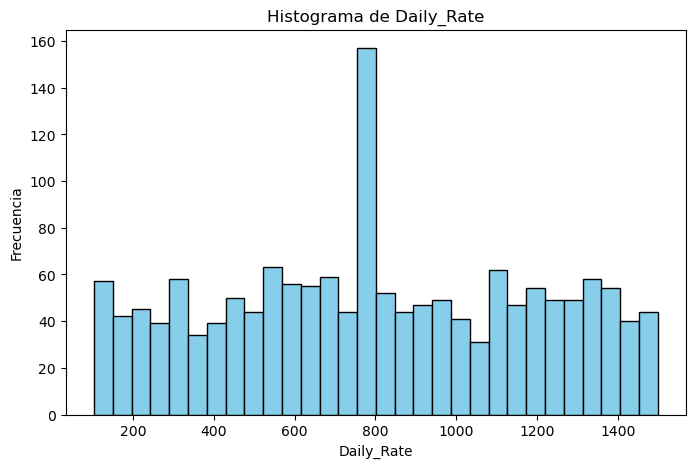

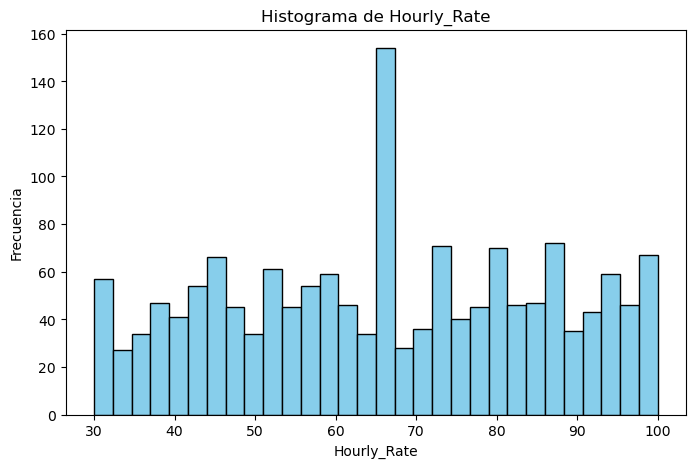

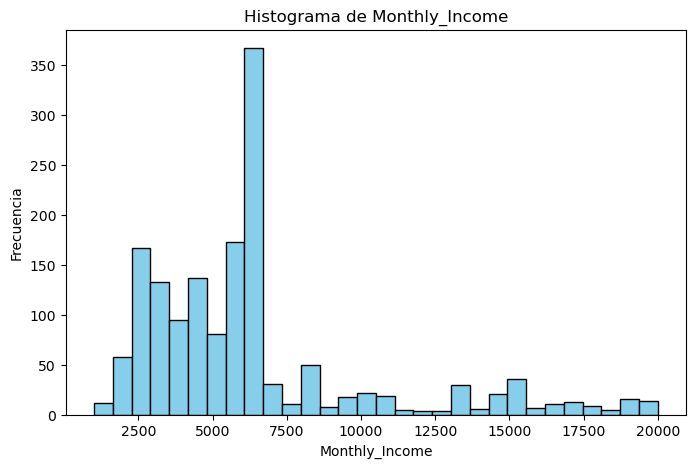

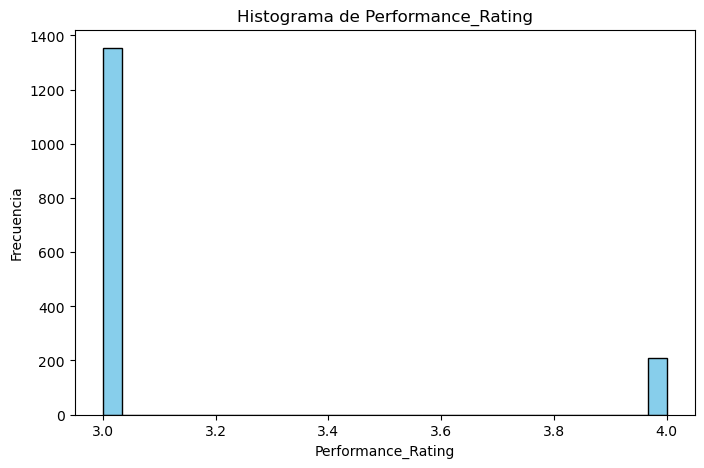

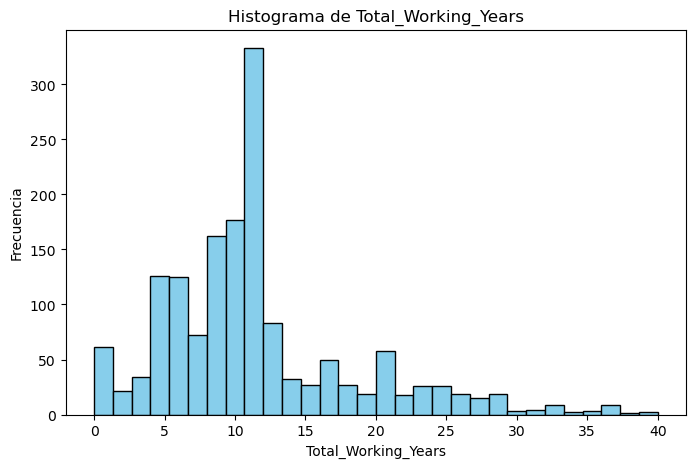

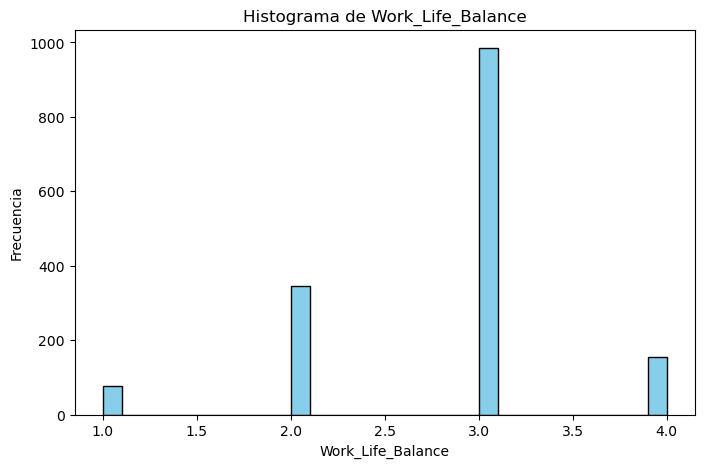

In [48]:
#Visualización de gráficas de las variables numéricas:
import matplotlib.pyplot as plt

# Lista de columnas para las que quieres hacer histogramas

# Crear un histograma separado para cada columna
for col in list(columnas_number_con_nulos):
    plt.figure(figsize=(8, 5))
    plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

## FASE 3: IMPORTAMOS BBDD A SQL

In [2]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from sqlalchemy import create_engine
import mysql.connector
from mysql.connector import errorcode
import pymysql

# Paso 1: Leer el CSV
df = pd.read_csv('HR RAW DATA CLEAN.csv')  # Asegúrate que el archivo esté en el mismo directorio

# Paso 2: Crear conexión a MySQL usando SQLAlchemy
# Reemplaza con tus credenciales reales
usuario = 'root'
contraseña = 'AlumnaAdalab'
host = '127.0.0.1'
basededatos = 'Proyecto_Modulo3'

# Engine de SQLAlchemy (usa pymysql como conector)
engine = create_engine(f'mysql+pymysql://{usuario}:{contraseña}@{host}/{basededatos}')


# Paso 3: Exportar el DataFrame a SQL (cuidado con el nombre de la tabla)
df.to_sql('hr_raw_data_clean', con=engine, if_exists='replace', index=False)

print("✅ CSV importado exitosamente a la base de datos.")



✅ CSV importado exitosamente a la base de datos.
